In [1]:
from datetime import datetime

import polars as pl

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
plt.rcParams['font.family'] = 'SimSun'
plt.rcParams['axes.unicode_minus'] = False

from config import CONFIG

In [2]:
path = f"{CONFIG.PROCESSED_DATA_PATH}/train/6/NWP_1.parquet"
df1_pl = (
    pl.read_parquet(path)
    .filter(
        (pl.col("forecast_time") < datetime(2024, 1, 3, 0, 0, 0)) & 
        (pl.col("lat") == 5) &
        (pl.col("lon") == 5) 
    )
    .with_columns([
        pl.col("forecast_time").dt.hour().alias("hour"),
        # ((pl.col("v100")**2 + pl.col("u100")**2)**0.5).alias("wind_speed"),
    ])
    # .with_columns([
    #     (0.5 * 1.225 * pl.col("wind_speed")**3).alias("wind_power"),
    # ])
    # .with_columns([
    #     ((270 - (pl.arctan2(pl.col("v100"), pl.col("u100")) * 180 / np.pi)) % 360).alias("wind_direction")
    # ])
    .sort(["forecast_time", "lat", "lon"])
)
df1_pl

shape: (24, 14)
┌─────────────────────┬─────┬─────┬─────┬───┬───────────┬───────────┬──────────┬──────┐
│ time                ┆ lat ┆ lon ┆ ghi ┆ … ┆ u100      ┆ v100      ┆ plant_id ┆ hour │
│ ---                 ┆ --- ┆ --- ┆ --- ┆   ┆ ---       ┆ ---       ┆ ---      ┆ ---  │
│ datetime[ns]        ┆ i64 ┆ i64 ┆ f64 ┆   ┆ f64       ┆ f64       ┆ i32      ┆ i8   │
╞═════════════════════╪═════╪═════╪═════╪═══╪═══════════╪═══════════╪══════════╪══════╡
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -8.205399 ┆ 0.330429  ┆ 6        ┆ 0    │
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -7.908035 ┆ 0.098999  ┆ 6        ┆ 1    │
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -7.660751 ┆ -0.101334 ┆ 6        ┆ 2    │
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -7.58783  ┆ 0.053741  ┆ 6        ┆ 3    │
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -7.492813 ┆ 0.133469  ┆ 6        ┆ 4    │
│ …                   ┆ …   ┆ …   ┆ …   ┆ … ┆ …         ┆ …         ┆ …        ┆ …    │
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -5.028412 ┆ -1.102402 ┆ 6        ┆ 19   │
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -5.461243 ┆ -0.344254 ┆ 6        ┆ 20   │
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -5.482468 ┆ 0.019577  ┆ 6        ┆ 21   │
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -5.067368 ┆ -0.023956 ┆ 6        ┆ 22   │
│ 2024-01-01 16:00:00 ┆ 5   ┆ 5   ┆ 0.0 ┆ … ┆ -4.37146  ┆ -0.978821 ┆ 6        ┆ 23   │
└─────────────────────┴─────┴─────┴─────┴───┴───────────┴───────────┴──────────┴──────┘

In [3]:
df1_target_pl = (
    pl.read_csv(f"{CONFIG.RAW_DATA_PATH}/train/fact_data_train/6_normalization_train.csv")
    .with_columns([
        pl.col("时间").str.to_datetime("%Y-%m-%d %H:%M:%S").alias("forecast_time")
    ])
    .rename({"功率(MW)": "target"})
    .drop("时间")
    .sort("forecast_time") 
    .fill_null(0)
    .filter(
        (pl.col("forecast_time") >= datetime(2024, 1, 2, 0, 0, 0))&
        (pl.col("forecast_time") < datetime(2024, 1, 3, 0, 0, 0))
    )
    .select(["forecast_time", "target"])
)
df1_target_pl

shape: (96, 2)
┌─────────────────────┬────────┐
│ forecast_time       ┆ target │
│ ---                 ┆ ---    │
│ datetime[μs]        ┆ f64    │
╞═════════════════════╪════════╡
│ 2024-01-02 00:00:00 ┆ 0.0    │
│ 2024-01-02 00:15:00 ┆ 0.0    │
│ 2024-01-02 00:30:00 ┆ 0.0    │
│ 2024-01-02 00:45:00 ┆ 0.0    │
│ 2024-01-02 01:00:00 ┆ 0.0    │
│ …                   ┆ …      │
│ 2024-01-02 22:45:00 ┆ 0.0    │
│ 2024-01-02 23:00:00 ┆ 0.0    │
│ 2024-01-02 23:15:00 ┆ 0.0    │
│ 2024-01-02 23:30:00 ┆ 0.0    │
│ 2024-01-02 23:45:00 ┆ 0.0    │
└─────────────────────┴────────┘

ColumnNotFoundError: "msl" not found

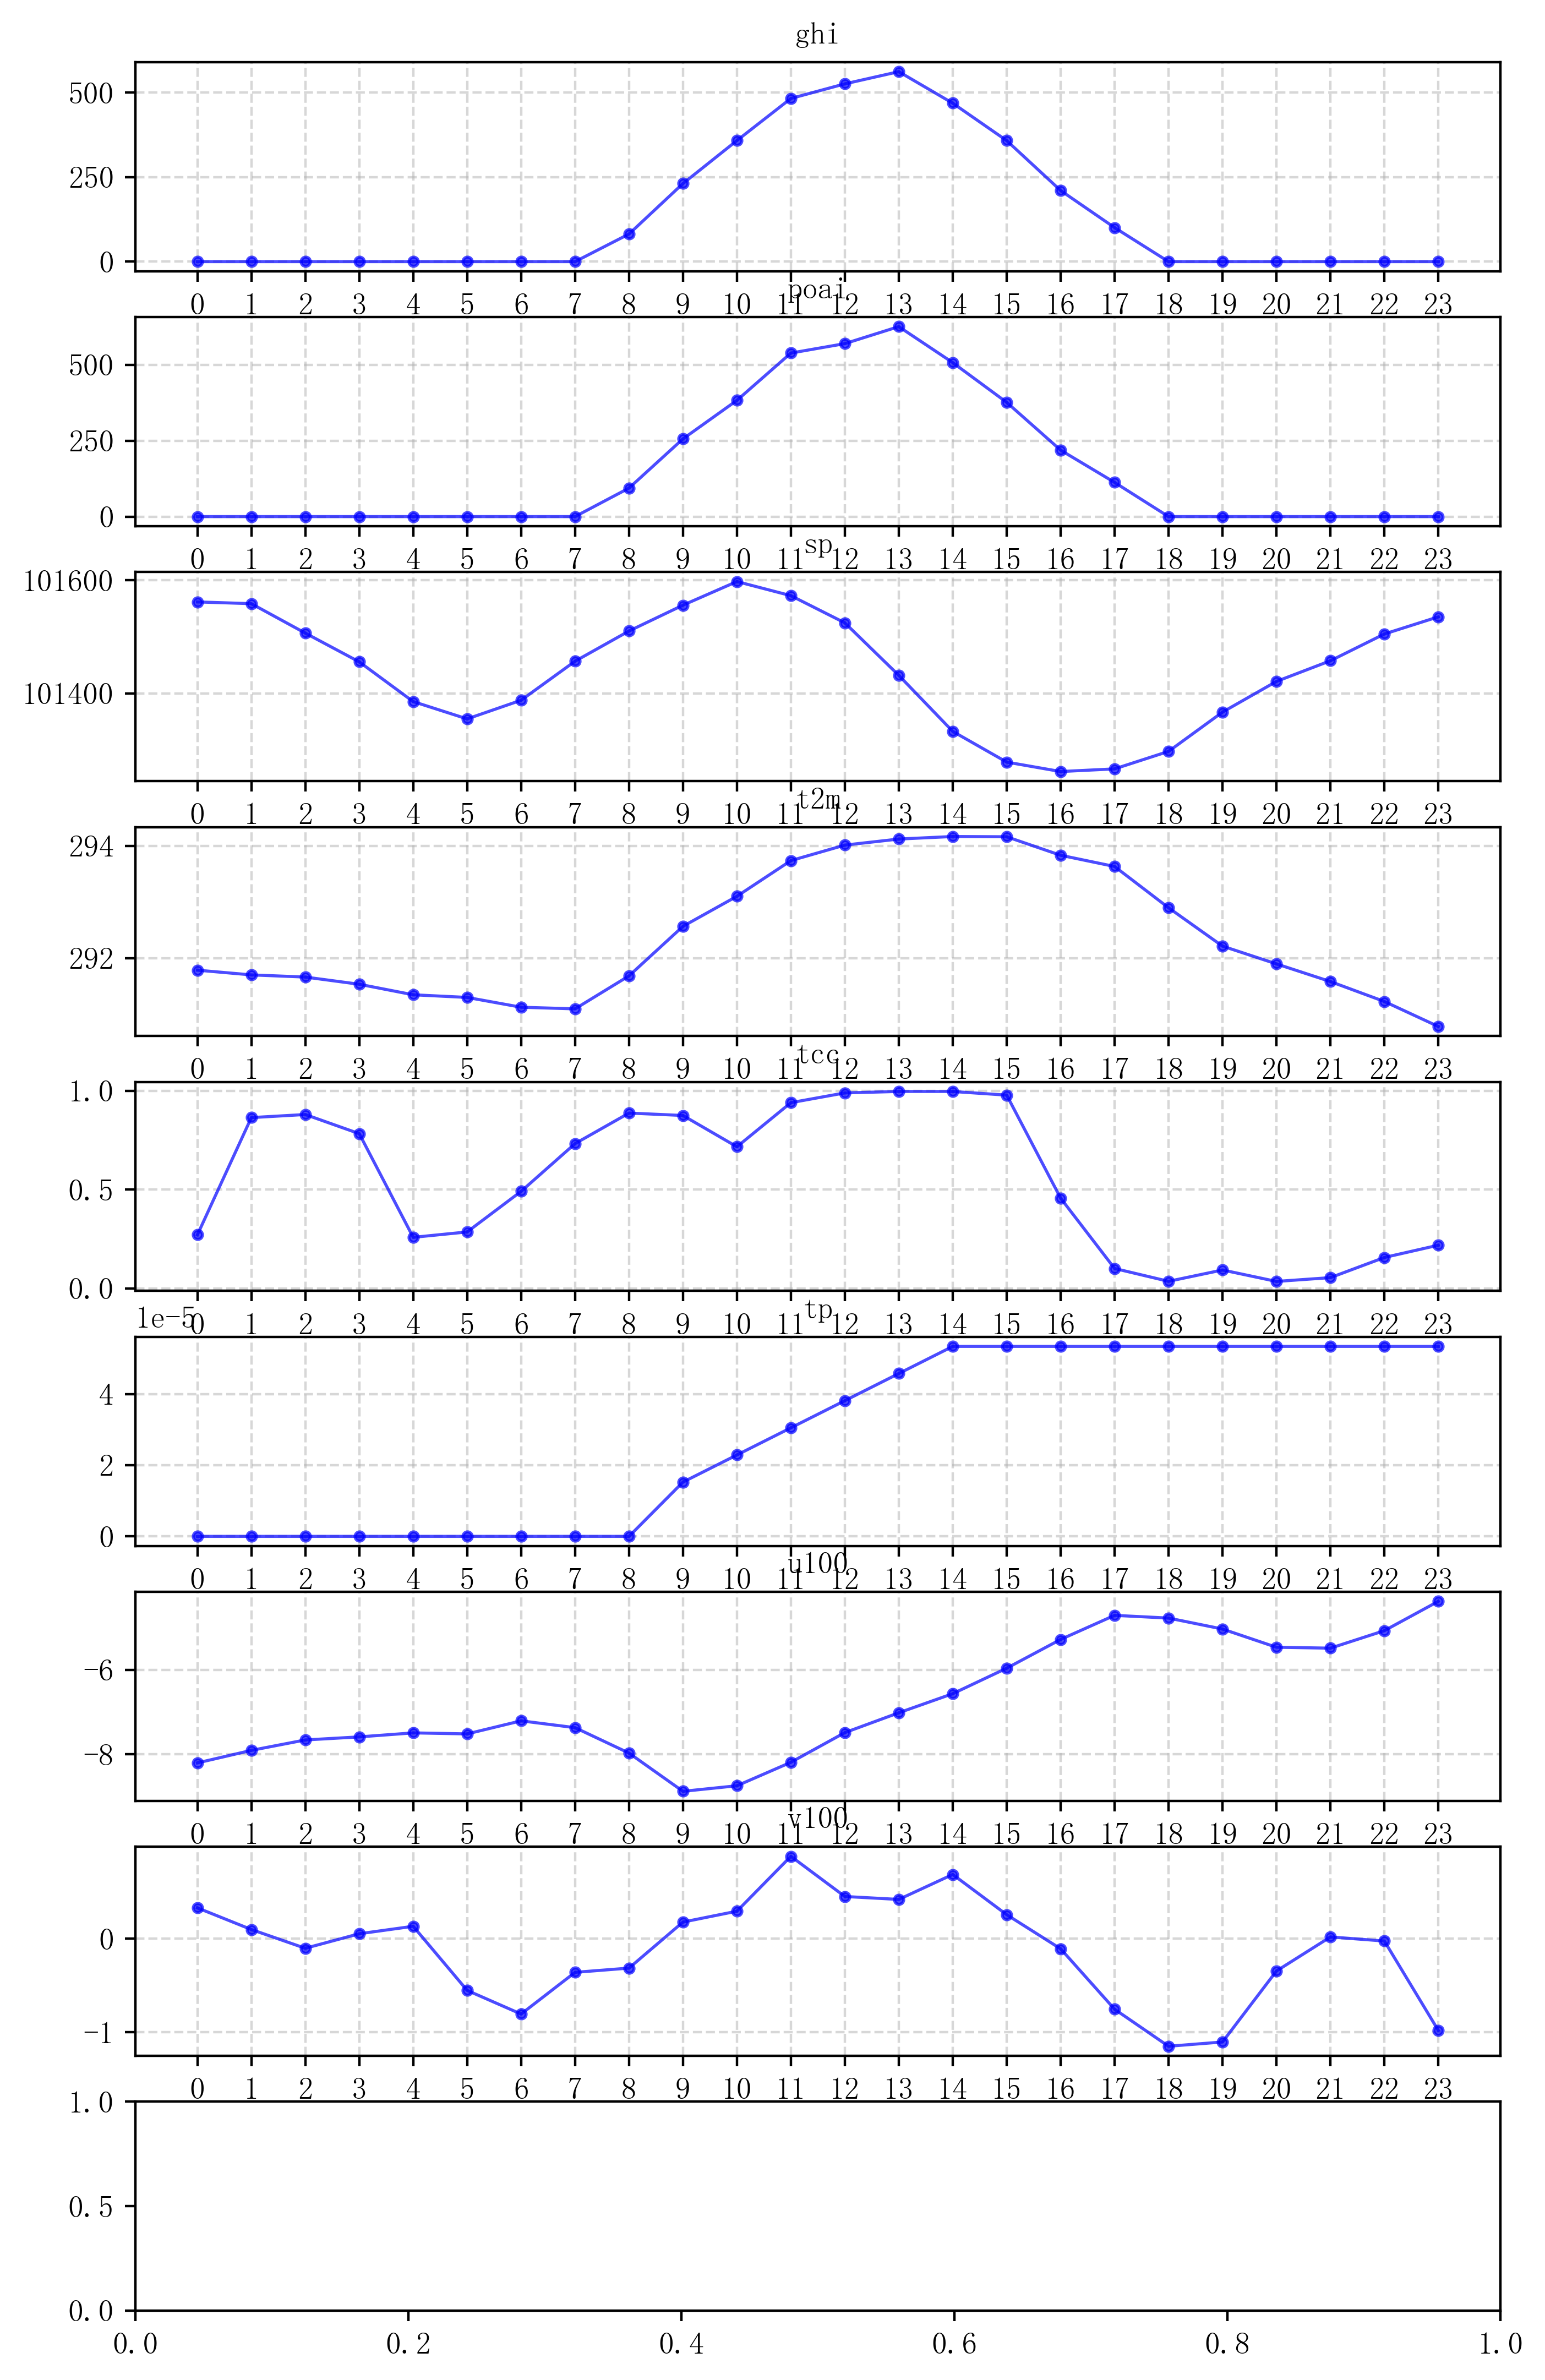

In [4]:
variables = CONFIG.RAW_FEATURES #+ ["wind_speed", "wind_power", "wind_direction"]
num_vars = len(variables)

# 子图布局
ncols = 1
nrows = num_vars

fig = plt.figure(figsize=(8, 16), dpi=400)
gs = gridspec.GridSpec(nrows=nrows + 1, ncols=ncols, height_ratios=[1]*nrows + [2])

axes = []

# 小时级子图
for i, var in enumerate(variables):
    ax = fig.add_subplot(gs[i // ncols, i % ncols])
    ax.plot(df1_pl['hour'], df1_pl[var], 
            marker='o', markersize=3, 
            linestyle='-', linewidth=1, 
            color='blue', alpha=0.7)
    ax.set_title(var, fontsize=10)
    # ax.set_xlabel('小时')
    # ax.set_ylabel(var)
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.set_xticks(np.arange(0, 24, 1))
    axes.append(ax)

# 关掉多余子图
for j in range(i+1, nrows * ncols):
    fig.delaxes(fig.add_subplot(gs[j // ncols, j % ncols]))

# 最后一排：合并两列，画功率target的15分钟级时序图
ax_target = fig.add_subplot(gs[-1, :])

ax_target.plot(df1_target_pl['forecast_time'], df1_target_pl['target'], 
               color='red', marker='.', linestyle='-', linewidth=1, alpha=0.8)
ax_target.set_title('发电功率时序图', fontsize=10)
ax_target.set_xlabel('时间')
ax_target.set_ylabel('功率 (MW)')
ax_target.grid(True, linestyle='--', alpha=0.5)

ax_target.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax_target.xaxis.set_major_locator(mdates.HourLocator(interval=1))
plt.setp(ax_target.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.suptitle('光伏电场6-2024.1.2日坐标点 (5,5) 上各变量及功率时序变化', fontsize=14)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
